# Inteligencia Artificial - Maximización de Beneficios en tienda Online

> Objetivo: Elegir la mejor estrategia de marketing para que un cliente se suscriba a un servicio Premium

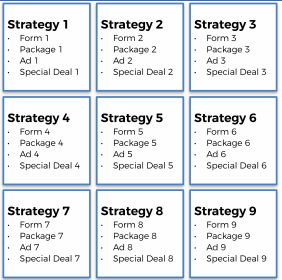

Por ejemplo, supongamos que Amazon desea elegir que campaña mostrar a determinados clientes para que adquieran Amazon Prime

> Metodología: Cada cliente tendrá un identificador al que se le asigna una estrategia, la combinación de ambas deberá dar un resultado de 1 (suscripción). Se puede mostrar distintas estrategias a distintos usuarios y observar cual es la mejor estrategia para cada cliente. En un principio las estrategias se muestran aleatoriamente a los clientes, pero mediante muestreo de thompson se irán localizando las mejores estrategias.

### Establecimiento de modelo

> El problema es que no pueden plantearse todas las estrategias a todos los clientes, esto sería demasiado costoso en tiempo y recursos, el verdadero proposito de la implementación de IA aquí, supone la optimización de muestreo; el tener que mostrar a cada cliente el menor número de estrategías pero obteniendo el mayor ratio de conversión

### Problema del Bandido Multi Brazo

Una maquina tragaperras posee un brazo del que hay que tirar para accionar la maquina. 
(La maquina sería el bandido y el brazo la palanca para accionarla)

El problema del bandido multi brazo se da cuanto al entrar a un casino, hay varias maquinas tragaperras a elegir, 

¿Qué maquina debería elegir el jugador? 

Una forma de elegir la mejor maquina que da más recompensas sería probar N veces cada maquina serialmente, la cual sería la estrategia más segura de saber cual arroja más recompensas, no obstante no sería la estrategia más optima. 

Supongamos que existen n máquinas (D1,D2...Dn) 

Cada máquina dará una recompensa cada X ensayos (desviación de recompensa) y cada recompensa será mayor o menor (pudiendo sacarse la media de recompensa). Teniendo la media y desviación se puede obtener la distribución con la que cada máquina reparte recompensas. Por ejemplo, supongamos que una maquina da de media 10 de recompensa con una desviación de 3. Por supuesto las distribuciones no se conocen, es precisamente el objetivo; conocer cual es la distribución de cada maquina, pero haciendo el menor numero de intentos posibles en cada maquina.

Este problema se propuso en su origen con las maquinas tragaperras pero puede extrapolarse perfectamente al que atañe: Por ejemplo, si tienes 10 anuncios y quieres saber cual es el que da más recompensas, cada vez que le muestras a un cliente un anuncio sería como si se tirara de la palanca, el puede comprar tu producto o no hacerlo y cada vez que el cliente compra un producto lo hace con una desviación (cada x clientes se compra un producto n veces) así mismo cada vez que se compra se puede comprar un producto de mayor o menor precio (obteniendose la media de dinero que se obtiene cuando un cliente compra por cada ensayo)



### Muestreo de Thompson para resolver el problema del bandido multi-brazo

> Parámetros y recompensas:

- Se tienen d brazos (Ejemplo: 10 anuncios). 

- Cada vez que se muestra a un cliente un brazo se produce un ensayo (n)

- En cada ensayo n se elige uno de los brazos d a mostrar, el cual generará una recompensa i: {0,1}

- El objetivo es maximizar las recompensas a través de los ensayos que se llevan a cabo

- El anuncio d da una recompensa y con distribución binomial de Bernoulli: p(y|0i), se desconoce 0, pero se asume una distribución uniforme, por regla de bayes se obtiene p(0i|y) ~ B(numero de exitos +1, numero de fracasos +1).

- A cada ensayo n se obtiene un valor aleatorio de 0i(n) de la distribución p para cada i.

- A cada ronda n se selecciona el anuncio i con el mayor valor 0i(n) 

> ¿Cómo funciona el muestreo de Thompson? 


- Primero realizo unas cuantas muestras al azar para cada anuncio y obtengo una distribución estimada con pocas muestras

- Selecciono un numero aleatorio contenido dentro de cada muestra para anuncio (10 anuncios, genero 10 numeros, uno para cada)

- De los numeros aleatorios generados, tomo aquel que sea el mayor (el que de mayor beneficio)

- Tomo la distribución que seleccioné en el paso anterior y genero un nuevo numero aleatorio de esta distribución 

- El nuevo numero lo añado a la distribución inicial corrigiendola ligeramente. 

- Vuelvo a generar otros 10 numeros aleatorios y a repetir el proceso 


De esta forma se van ajustando las distribuciones unicamente de los anuncios que parecen dar el mejor retorno 


# Implementación: 

## SIMULACIÓN

In [4]:
import pandas as pd 
simulacion = pd.DataFrame()

simulacion["Estrategia"] = range(1,10)
simulacion["ratio"] = [0.05,0.13,0.09,0.16,0.11,0.04,0.20,0.08,0.01]
simulacion

,Estrategia,ratio
0,1,0.05
1,2,0.13
2,3,0.09
3,4,0.16
4,5,0.11
5,6,0.04
6,7,0.20
7,8,0.08
8,9,0.01


> El muestreo de Thompson debería de ser capaz de identificar la estrategia 7 como la mejor. 

### Librerias:

In [80]:
import numpy as np 
import matplotlib.pyplot as plt 
import random 

### Parámetros:

In [6]:
N = 10000   # Numero total de rondas, es decir, el numero total de clientes a intentar convertir 
d = 9       # Numero total de estrategias a probar

### Generación de la muestra: 

In [47]:
# Primero: Generación de numeros aleatorios para cada estrategia:
conversion_rates = simulacion["ratio"]

X = np.array(np.zeros([N,d]))    #Matriz con ceros que rerpresenta los datos de conversion de Clientes 

#Generar numeros aleatorios para clientes:
for i in range(N):     #Para cada fila, cliente
    for j in range(d):     #Para cada columna, estrategia
        n_aleatorio =  np.random.rand()     #Generar un numero aleatorio entre 0 y 1 
        # Si el numero aleatorio generado es inferior a la estrategia de conversión elegida, se convierte dicho numero en 1 (Conversión de cliente)
        if n_aleatorio <= conversion_rates[j]:
            X[i,j] = 1 


In [62]:
#Veamos si se ha ejecutado correctamente sumando el numero de clientes que se han convertido en cada estrategia:
for indice, i in enumerate(range(d)):
    print(indice+1, sum(X[::,i]))

1 522.0
2 1353.0
3 944.0
4 1653.0
5 1099.0
6 371.0
7 2005.0
8 807.0
9 86.0


> Como es de esperar, la estrategia 7 es la que ha dado mejor ratio de conversión (2005 clientes), aunque claro, eso no lo sabemos, es lo que debemos descubrir.

In [79]:
X[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

> Por ejemplo, el primer cliente  se convertiria unicamente aplicandole la estrategia 4

### Selección aleatoria y muestreo de Thompson:

In [114]:
estrategias_aleatorio = []   #Estrategias seleccionadas aleatoreamente
estrategias_thompson = []       #Estrategias seleccionadas por muestreo de Thompson 
total_aleatorio = 0     #Total de clientes convertidos mediante muestreo aleatorio 
total_thompson = 0       #Total de clientes convertidos mediante muestreo de Thompson 
n_1 = [0]*d      #Recompensas recibidas para cada estrategia (9 listas)
n_0 = [0]*d      # No recompensas recibidas por cada estrategia (9 listas)


for cliente in range(N):      #Para cada cliente
    #Muestreo Aleatorio:
    estrategia_random = random.randrange(d)   #Seleccionar una estrategia al azar
    estrategias_aleatorio.append(estrategia_random)      #Añadir dicha estrategia a la lista de estrategias seleccionadas 
    recompensa_random = X[cliente,estrategia_random]    # recompensa_d = Conversión (o no) de n cliente para la estrategia seleccionada aleatoreamente
    total_aleatorio += recompensa_random   #Guardar la recompensa dada por el cliente para la estrategia

    # Muestreo de Thompson: 
    max_random = 0 
    estrategia_thompson = 0 
    for estrategia in range(d):                  #Para cada estrategia        
        random_beta = random.betavariate(n_1[estrategia]+1,n_0[estrategia]+1)      #Distribución beta para cada estrategia
        
        if random_beta > max_random: #Siempre que el anuncio tenga un ratio mejor al anterior
            max_random = random_beta 
            estrategia_thompson = estrategia         # me quedo con dicho anuncio 
    
    recompensa_thompson = X[cliente,estrategia_thompson]
    
    #Actualizar distribución beta según se obtiene recompensa: 
    if recompensa_thompson == 1: 
        n_1[estrategia_thompson] += 1 
    else:
        n_0[estrategia_thompson] += 1 
        
    #Actualizar estrategias y total para comparar con muestreo aleatorio 
    estrategias_thompson.append(estrategia_thompson)
    total_thompson += recompensa_thompson


### Beneficios del muestreo de Thompson:

In [143]:
retorno_absoluto = (total_thompson - total_aleatorio)
retorno_relativo =  (total_thompson - total_aleatorio) / total_aleatorio
print(f"El muestro de Thompson consigue {retorno_absoluto} clientes más que haciendolo de forma aleatoria, lo que supone una mejora del {round(retorno_relativo*100)} % ")

El muestro de Thompson consigue 916.0 clientes más que haciendolo de forma aleatoria, lo que supone una mejora del 93.0 % 


> El muestreo de Thompson es un 93% mejor, es decir casi un 100%: El muestreo de Thompson aporta un beneficio de casi el doble